<a href="https://colab.research.google.com/github/dubidub/THE-REPRESENTATION-AND-MEASUREMENTS-OF-URBAN-TRANSPORTATION-NETWORKS/blob/main/4_1_Implications_for_Urban_Transportation_Planning_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import files, drive
drive.mount("/content/drive")

Mounted at /content/drive


# Calculation of Delay Time

## OD Matrix (villages)

In [2]:
import pandas as pd

In [3]:
# Load pre-saved data retrieved from the previous study 
travelTime_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Taipei Transportation/travelTime/travelTime_df.csv')
travelTime_df['travel_time_delay'] = travelTime_df['trafficTime'] / travelTime_df['baseTime'] - 1
travelTime_df

Unnamed: 0  origin  ... travelTime  travel_time_delay
0                0  中山區下埤里  ...          0                NaN
1                1  中山區下埤里  ...        574           0.112403
2                2  中山區下埤里  ...        467           0.133495
3                3  中山區下埤里  ...        461           0.102871
4                4  中山區下埤里  ...        657           0.102349
...            ...     ...  ...        ...                ...
207931      207931  萬華區騰雲里  ...        455           0.050808
207932      207932  萬華區騰雲里  ...        337           0.166090
207933      207933  萬華區騰雲里  ...        580           0.239316
207934      207934  萬華區騰雲里  ...        260           0.192661
207935      207935  萬華區騰雲里  ...          0                NaN

[207936 rows x 8 columns]

In [ ]:
travelTime_df['travel_time_delay'].describe()

count    207478.000000
mean          0.227721
std           0.086456
min           0.000000
25%           0.173594
50%           0.215210
75%           0.264388
max           0.970390
Name: travel_time_delay, dtype: float64

In [ ]:
travelTime_df['travel_time_delay'].quantile([0, .05, .25, .5, .75, .95, 1])

0.00    0.000000
0.05    0.119565
0.25    0.173594
0.50    0.215210
0.75    0.264388
0.95    0.388430
1.00    0.970390
Name: travel_time_delay, dtype: float64

In [4]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10,5))
x = travelTime_df['travel_time_delay']
plt.hist(x, bins = 'auto', color='red', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.axvline(0, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.119565, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.215210, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.388430, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.970390, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.text(-0.01, 4270, "Min")
plt.text(0.110565, 4270, "5%")
plt.text(0.195210, 4270, "Median")
plt.text(0.380430, 4270, "95%")
plt.text(0.955390, 4270, "Max")
plt.xlabel('Time Delay')
plt.ylabel('Counts')
plt.figtext(.5,0.96,'Travel-Time Delay of 207,936 Routes', fontsize=16, ha='center')

plt.show()

In [ ]:
# fig.savefig('time_delay_histo.png', dpi = 200, bbox_inches = 'tight')
# files.download('time_delay_histo.png')

In [ ]:
test1 = travelTime_df[travelTime_df.isna().any(axis=1)]
test1[test1['origin']!=test1['destination']]

Unnamed: 0  origin  ... travelTime  travel_time_delay
100542      100542  士林區天和里  ...          0                NaN
101452      101452  士林區天山里  ...          0                NaN

[2 rows x 8 columns]

In [5]:
travelTime_df.drop(columns = ['Unnamed: 0'], inplace=True)
travelTime_df['travel_time_delay'].fillna(0, inplace=True)
od_df = pd.pivot_table(travelTime_df, values='travel_time_delay', index=['origin'], columns=['destination'])
od_df

destination    中山區下埤里    中山區中原里    中山區中吉里  ...    萬華區青山里    萬華區頂碩里    萬華區騰雲里
origin                                     ...                              
中山區下埤里       0.000000  0.112403  0.133495  ...  0.190871  0.189621  0.125405
中山區中原里       0.207547  0.000000  0.201183  ...  0.187418  0.239506  0.166074
中山區中吉里       0.155172  0.000000  0.000000  ...  0.124260  0.215640  0.149144
中山區中央里       0.168618  0.146341  0.080357  ...  0.157965  0.233161  0.155396
中山區中山里       0.238636  0.138889  0.175097  ...  0.123100  0.220390  0.240163
...               ...       ...       ...  ...       ...       ...       ...
萬華區錦德里       0.532637  0.277952  0.350444  ...  0.257294  0.274834  0.234568
萬華區雙園里       0.343722  0.275089  0.294829  ...  0.279310  0.153374  0.191011
萬華區青山里       0.286667  0.258929  0.283333  ...  0.000000  0.318750  0.297468
萬華區頂碩里       0.310480  0.234694  0.258865  ...  0.294702  0.000000  0.173077
萬華區騰雲里       0.351325  0.287383  0.295429  ...  0.239316  0.192661  0.000000

[456 rows x 456 columns]

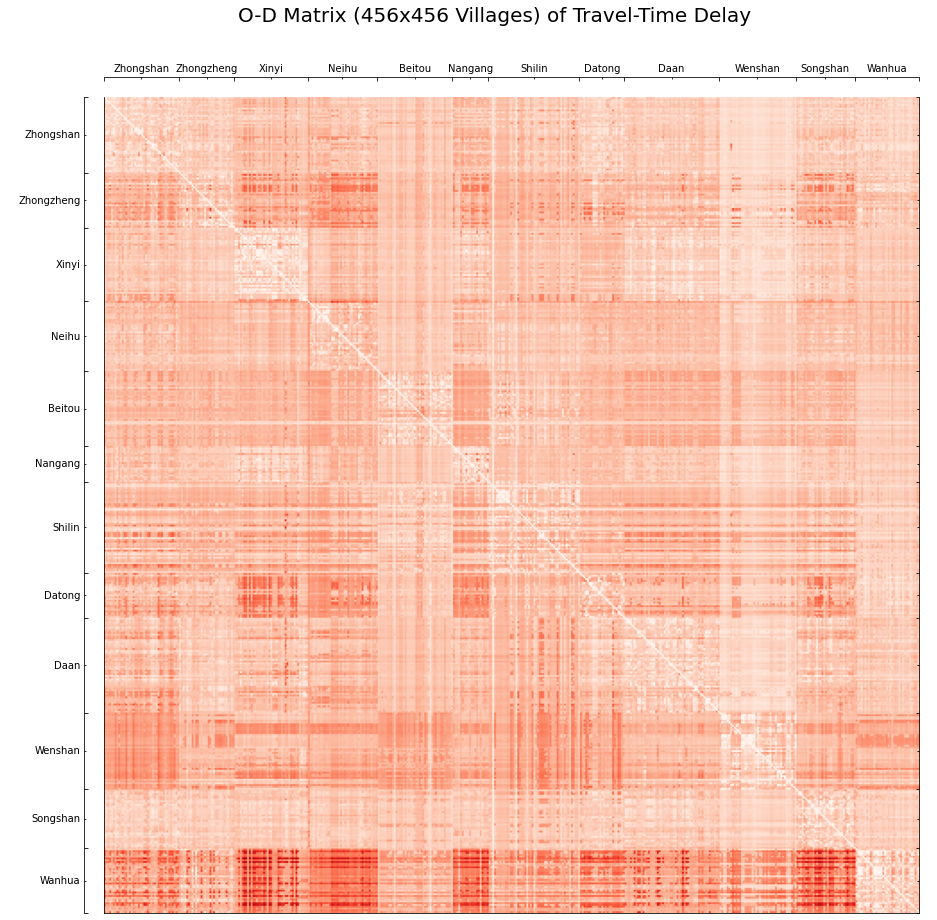

In [6]:
from mpl_toolkits.axisartist import SubplotHost
from matplotlib import ticker
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(15,15))

ax = SubplotHost(fig, 111)
fig.add_subplot(ax)
cax = ax.imshow(od_df, cmap='Reds');
ax.set_xticks([])
ax.set_yticks([])
# Add second axis
ax2 = ax.twiny()
offset = 0, 20 # Position of the second axis
new_axisline = ax2.get_grid_helper().new_fixed_axis
ax2.axis["top"] = new_axisline(loc="top", axes=ax2, offset=offset)
ax2.axis["bottom"].set_visible(False)
# Add x ticks
xticks = [0, 42, 73, 114, 153, 195, 215, 266, 291, 344, 387, 420, 456]
Locator = [21, 57.5, 93.5, 133.5, 174, 205, 240.5, 278.5, 317.5, 365.5, 403.5, 438]
Formatter = ['Zhongshan', 'Zhongzheng', 'Xinyi', 'Neihu', 'Beitou', 'Nangang', 'Shilin', 'Datong', 'Daan', 'Wenshan', 'Songshan', 'Wanhua']
ax2.set_xticks(xticks)
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator(Locator))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(Formatter))

ax3 = ax.twinx()
offset = -20, 0 # Position of the second axis
new_axisline = ax2.get_grid_helper().new_fixed_axis
ax2.axis["left"] = new_axisline(loc="left", axes=ax3, offset=offset)
ax2.axis["right"].set_visible(False)
# Add y ticks
yticks = [0, 36, 69, 112, 165, 190, 241, 261, 303, 342, 383, 414, 456]
Locator = [18, 52.5, 90.5, 138.5, 177.5, 215.5, 251, 282, 322.5, 362.5, 398.5, 435]
Formatter = ['Wanhua', 'Songshan', 'Wenshan', 'Daan', 'Datong', 'Shilin', 'Nangang', 'Beitou', 'Neihu', 'Xinyi', 'Zhongzheng', 'Zhongshan']
ax3.set_yticks(yticks)
ax3.yaxis.set_major_formatter(ticker.NullFormatter())
ax3.yaxis.set_minor_locator(ticker.FixedLocator(Locator))
ax3.yaxis.set_minor_formatter(ticker.FixedFormatter(Formatter))

plt.figtext(.5,0.95,'O-D Matrix (456x456 Villages) of Travel-Time Delay ', fontsize=20, ha='center')

plt.show()

In [ ]:
# fig.savefig('time_delay.png', dpi = 1000, bbox_inches = 'tight')
# files.download('time_delay.png')

## OD Matrix (district)

In [7]:
dist_travelTime_df = travelTime_df.copy()
# extract 12 districts from origin and destination 
dist_ori = pd.Series([i[:3] for i in travelTime_df['origin']]) 
dist_des = pd.Series([i[:3] for i in travelTime_df['destination']])
dist_travelTime_df['dist_ori'] = pd.Series(dist_ori) 
dist_travelTime_df['dist_des'] = pd.Series(dist_des)
dist_travelTime_df['dist_ori_des'] = dist_ori + dist_des
# regroup 12x12 O-D 
dist_ori_des_df = dist_travelTime_df.groupby('dist_ori_des').sum()
dist_ori_des_df.reset_index(inplace=True)
dist_ori_des_df['travel_time_delay'] = dist_ori_des_df['trafficTime'] / dist_ori_des_df['baseTime'] - 1
dist_ori_des_df

dist_ori_des  baseTime  ...  travelTime  travel_time_delay
0         中山區中山區    713076  ...      832792           0.167887
1         中山區中正區    913910  ...     1079754           0.181466
2         中山區信義區   1486448  ...     1809513           0.217340
3         中山區內湖區   1534316  ...     1865268           0.215700
4         中山區北投區   2107110  ...     2502422           0.187609
..           ...       ...  ...         ...                ...
139       萬華區大同區    598502  ...      826609           0.381130
140       萬華區大安區   1515860  ...     2018627           0.331671
141       萬華區文山區   1720524  ...     2206581           0.282505
142       萬華區松山區   1234065  ...     1787585           0.448534
143       萬華區萬華區    408012  ...      482725           0.183115

[144 rows x 6 columns]

In [ ]:
dist_ori_des_df.describe()

baseTime      distance  ...    travelTime  travel_time_delay
count  1.440000e+02  1.440000e+02  ...  1.440000e+02         144.000000
mean   1.453213e+06  1.299502e+07  ...  1.788296e+06           0.228084
std    7.916200e+05  8.170932e+06  ...  9.834575e+05           0.058702
min    1.501510e+05  9.183630e+05  ...  1.736610e+05           0.137225
25%    8.935522e+05  7.116899e+06  ...  1.074117e+06           0.188416
50%    1.358902e+06  1.133224e+07  ...  1.625691e+06           0.218474
75%    1.923741e+06  1.707025e+07  ...  2.306506e+06           0.252708
max    3.680201e+06  3.672424e+07  ...  4.741868e+06           0.449942

[8 rows x 5 columns]

In [8]:
dist_ori_des_df['origin'] = pd.Series([i[:3] for i in dist_ori_des_df['dist_ori_des']]) 
dist_ori_des_df['destination'] = pd.Series([i[3:] for i in dist_ori_des_df['dist_ori_des']]) 

chi_list = list(set(dist_ori_des_df['origin'].tolist()))
chi_list = ['中山區', '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區', '萬華區']
eng_list = ['Zhongshan', 'Zhongzheng', 'Xinyi', 'Neihu', 'Beitou', 'Nangang', 'Shilin', 'Datong', 'Daan', 'Wenshan', 'Songshan', 'Wanhua']
dist_ori_des_df.replace(chi_list, eng_list, inplace=True)

dist_od_df = pd.pivot_table(dist_ori_des_df, values='travel_time_delay', index=['origin'], columns=['destination'])

dist_od_df = dist_od_df.reindex(['Zhongshan', 'Zhongzheng', 'Xinyi', 'Neihu', 'Beitou', 'Nangang', 'Shilin', 'Datong', 'Daan', 'Wenshan', 'Songshan', 'Wanhua'])
dist_od_df = dist_od_df[['Zhongshan', 'Zhongzheng', 'Xinyi', 'Neihu', 'Beitou', 'Nangang', 'Shilin', 'Datong', 'Daan', 'Wenshan', 'Songshan', 'Wanhua']]
dist_od_df

destination  Zhongshan  Zhongzheng     Xinyi  ...   Wenshan  Songshan    Wanhua
origin                                        ...                              
Zhongshan     0.167887    0.181466  0.217340  ...  0.138026  0.184099  0.162194
Zhongzheng    0.267776    0.198962  0.282203  ...  0.164596  0.277800  0.193612
Xinyi         0.208061    0.185817  0.155955  ...  0.137225  0.195362  0.188456
Neihu         0.215738    0.229466  0.219882  ...  0.179508  0.217927  0.217643
Beitou        0.239205    0.236126  0.243903  ...  0.219479  0.239453  0.185898
Nangang       0.212353    0.195416  0.169691  ...  0.146300  0.192534  0.180068
Shilin        0.228368    0.234514  0.236015  ...  0.192172  0.215839  0.175081
Datong        0.268152    0.225378  0.328492  ...  0.198932  0.286615  0.163476
Daan          0.245132    0.188289  0.226470  ...  0.146226  0.220819  0.192557
Wenshan       0.332294    0.258428  0.261238  ...  0.184793  0.259451  0.269659
Songshan      0.177079    0.186071  0.189852  ...  0.168050  0.179155  0.176723
Wanhua        0.349851    0.277728  0.419680  ...  0.282505  0.448534  0.183115

[12 rows x 12 columns]

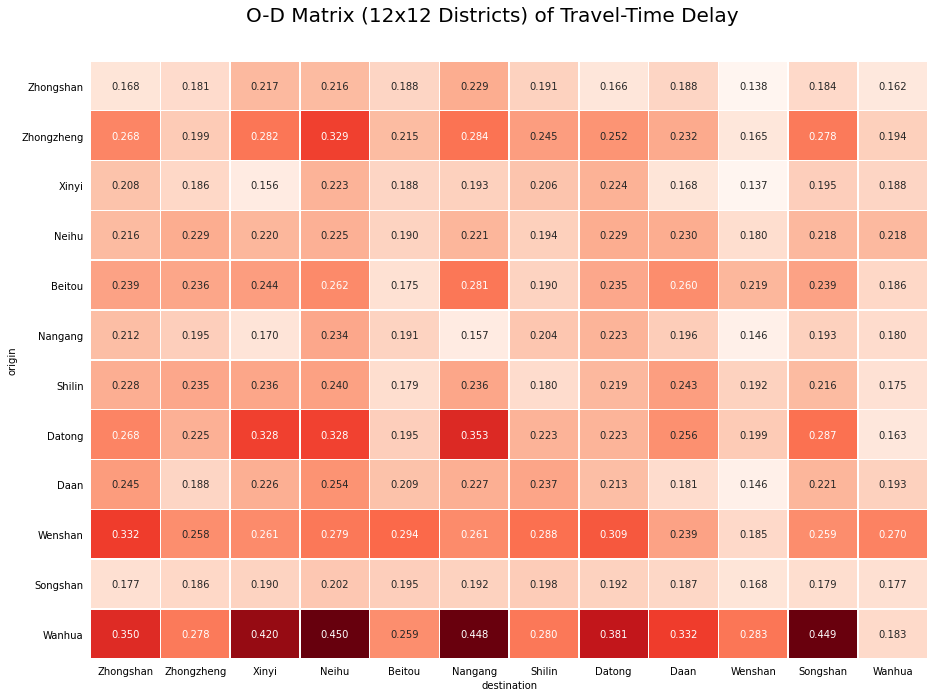

In [9]:
import seaborn as sns
fig = plt.figure(figsize=(15,11))
ax = sns.heatmap(dist_od_df, annot=True, cbar=False, cmap='Reds', linewidths=.5, fmt = '.3f')
plt.tick_params(axis='both', which='major', labelsize=10, bottom=False, left=False)
plt.figtext(.5,0.93,'O-D Matrix (12x12 Districts) of Travel-Time Delay ', fontsize=20, ha='center')

plt.show()

In [ ]:
# fig.savefig('time_delay_district.png', dpi = 1000, bbox_inches = 'tight')

In [ ]:
dist_travelTime_df.replace(chi_list, eng_list, inplace=True)
out_reach = dist_travelTime_df.groupby('dist_ori')['travelTime'].sum() / dist_travelTime_df.groupby('dist_ori')['baseTime'].sum() - 1
in_reach = dist_travelTime_df.groupby('dist_des')['travelTime'].sum() / dist_travelTime_df.groupby('dist_des')['baseTime'].sum() - 1
dist_delay_ranking = pd.DataFrame({'delay_time_outward': out_reach, 'delay_time_inward': in_reach})

dist_delay_ranking = dist_delay_ranking.reindex(['Zhongshan', 'Zhongzheng', 'Xinyi', 'Neihu', 'Beitou', 'Nangang', 'Shilin', 'Datong', 'Daan', 'Wenshan', 'Songshan', 'Wanhua'])

fig = plt.figure(figsize=(5,5))
ax = sns.heatmap(dist_delay_ranking, annot=True, cmap='Reds', linewidths=.5, fmt = '.3f', cbar=False)
plt.tick_params(axis='both', which='major', labelsize=10, labelbottom = False, bottom=False, top = False, left=False, labeltop=True)

In [ ]:
# fig.savefig('time_delay_dist_summary.png', dpi = 200, bbox_inches = 'tight')
# files.download('time_delay_dist_summary.png')

## Average Travel Time Delay of Each Village

In [10]:
out_travel_delay = travelTime_df.groupby('origin')['travelTime'].sum() / travelTime_df.groupby('origin')['baseTime'].sum() - 1
in_travel_delay = travelTime_df.groupby('destination')['travelTime'].sum() / travelTime_df.groupby('destination')['baseTime'].sum() - 1
travel_delay_df = pd.DataFrame({'in': in_travel_delay, 'out': out_travel_delay})
travel_delay_df.reset_index(inplace=True)
travel_delay_df.rename(columns={'index': 'dist_neigh'}, inplace=True)
travel_delay_df.loc[442, 'dist_neigh'] = '萬華區糖蔀里'
travel_delay_df

dist_neigh        in       out
0       中山區下埤里  0.255756  0.170834
1       中山區中原里  0.230927  0.196639
2       中山區中吉里  0.244563  0.170955
3       中山區中央里  0.238142  0.181803
4       中山區中山里  0.220078  0.199629
..         ...       ...       ...
451     萬華區錦德里  0.181933  0.395877
452     萬華區雙園里  0.213386  0.347720
453     萬華區青山里  0.214848  0.285314
454     萬華區頂碩里  0.224144  0.305078
455     萬華區騰雲里  0.191278  0.332615

[456 rows x 3 columns]

In [ ]:
travel_delay_df.describe()

in         out
count  456.000000  456.000000
mean     0.234113    0.229821
std      0.034069    0.053283
min      0.086348    0.100413
25%      0.216228    0.192190
50%      0.235564    0.218331
75%      0.257508    0.254219
max      0.317715    0.488848

In [ ]:
travel_delay_df[['in', 'out']].quantile([0, .05, .25, .5, .75, .95, 1])

in       out
0.00  0.086348  0.100413
0.05  0.171016  0.171212
0.25  0.216228  0.192190
0.50  0.235564  0.218331
0.75  0.257508  0.254219
0.95  0.286388  0.331968
1.00  0.317715  0.488848

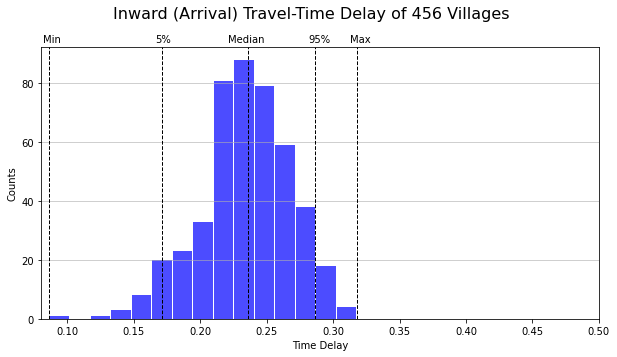

In [ ]:
fig = plt.figure(figsize=(10,5))
x = travel_delay_df['in']
plt.hist(x, bins = 15, rwidth=0.95, color='blue', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.axvline(0.086348, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.171016, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.235564, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.286388, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.317715, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.text(0.081348, 94, "Min")
plt.text(0.166016, 94, "5%")
plt.text(0.220564, 94, "Median")
plt.text(0.281388, 94, "95%")
plt.text(0.312715, 94, "Max")
plt.xlabel('Time Delay')
plt.ylabel('Counts')
plt.xlim([0.08,0.5])
plt.figtext(.5,0.96,'Inward (Arrival) Travel-Time Delay of 456 Villages', fontsize=16, ha='center')

plt.show()

In [ ]:
# fig.savefig('time_delay_histo_in.png', dpi = 200, bbox_inches = 'tight')
# files.download('time_delay_histo_in.png')

In [ ]:
fig = plt.figure(figsize=(10,5))
x = travel_delay_df['out']
plt.hist(x, bins='auto', rwidth=0.95, color='green', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.axvline(0.100413, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.171212, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.218331, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.331968, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.488848, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.text(0.095413, 81, "Min")
plt.text(0.166212, 81, "5%")
plt.text(0.207331, 81, "Median")
plt.text(0.326968, 81, "95%")
plt.text(0.483848, 81, "Max")
plt.xlabel('Time Delay')
plt.ylabel('Counts')
plt.xlim([0.08,0.5])
plt.figtext(.5,0.96,'Outward (Departure) Travel-Time Delay of 456 Villages', fontsize=16, ha='center')

plt.show()

In [ ]:
# fig.savefig('time_delay_histo_out.png', dpi = 200, bbox_inches = 'tight')

## Visualize on map

### Export GeoJSON to Kepler.gl

In [ ]:
# Download the original SHP file (TWD97_121 zone) from the MOI
# source: https://data.gov.tw/dataset/7440
!wget 'https://data.moi.gov.tw/MoiOD/System/DownloadFile.aspx?DATA=B8AF344F-B5C6-4642-AF46-1832054399CE'
!unzip 'DownloadFile.aspx?DATA=B8AF344F-B5C6-4642-AF46-1832054399CE'

In [ ]:
# use shapefile library to read SHP file
!pip install pyshp
import shapefile
tp_sf = shapefile.Reader('VILLAGE_MOI_1100115', encoding="UTF8")
len(tp_sf)

In [ ]:
shapes = tp_sf.shapes()
Town = []
Vill_eng = []
Vill_chi = []
Polygon = []
for i in range(len(shapes)):
  properties = tp_sf.record(i).as_dict()
  if properties['COUNTYNAME'] == '臺北市': 
    Polygon.append(shapes[i].points)
    Town.append(properties['TOWNNAME'])
    Vill_eng.append(properties['VILLENG'])
    Vill_chi.append(properties['VILLNAME'])
tp_df = pd.DataFrame({'Town': Town, 'Vill_eng': Vill_eng, 'Vill_chi': Vill_chi, 'Polygon': Polygon})
tp_df.replace('糖廍里', '糖蔀里', inplace=True)
tp_df['dist_neigh'] = tp_df['Town'] + tp_df['Vill_chi']
tp_df = tp_df.merge(travel_delay_df, on='dist_neigh')

tp_df['Town_eng'] = tp_df['Town']
chi_list = ['中山區', '中正區', '信義區', '內湖區', '北投區', '南港區', '士林區', '大同區', '大安區', '文山區', '松山區', '萬華區']
eng_list = ['Zhongshan', 'Zhongzheng', 'Xinyi', 'Neihu', 'Beitou', 'Nangang', 'Shilin', 'Datong', 'Daan', 'Wenshan', 'Songshan', 'Wanhua']
tp_df['Town_eng'].replace(chi_list, eng_list, inplace=True)
tp_df

Town        Vill_eng Vill_chi  ...        in       out  Town_eng
0    文山區   Zhangxin Vil.      樟新里  ...  0.177854  0.273389   Wenshan
1    文山區    Laoquan Vil.      老泉里  ...  0.150104  0.238645   Wenshan
2    文山區  Zhangjiao Vil.      樟腳里  ...  0.157210  0.279957   Wenshan
3    文山區   Zhangwen Vil.      樟文里  ...  0.167791  0.267882   Wenshan
4    文山區   Zhangshu Vil.      樟樹里  ...  0.175450  0.262453   Wenshan
..   ...             ...      ...  ...       ...       ...       ...
451  北投區   Quanyuan Vil.      泉源里  ...  0.230024  0.233032    Beitou
452  士林區   Pingdeng Vil.      平等里  ...  0.130943  0.100413    Shilin
453  北投區      Datun Vil.      大屯里  ...  0.145048  0.181837    Beitou
454  士林區   Jingshan Vil.      菁山里  ...  0.179104  0.157491    Shilin
455  北投區     Hutian Vil.      湖田里  ...  0.134249  0.139511    Beitou

[456 rows x 8 columns]

In [ ]:
tp_data = {}
tp_data['features'] = []
for i in range(len(tp_df)):
    item = {}
    
    geometry = {}
    geometry['type'] = 'Polygon' 
    geometry['coordinates'] = []
    # geometry['coordinates'].append()
    geometry['coordinates'].append(tp_df['Polygon'][i])

    properties = tp_df.iloc[i][['Town', 'Town_eng', 'Vill_chi', 'Vill_eng', 'in', 'out']].T.to_dict()
    
    item['geometry'] = geometry
    item['properties'] = properties
    item['type'] = "Feature"
    tp_data['features'].append(item)
tp_data['type'] = "FeatureCollection"

In [ ]:
with open('tp_data.geojson', 'w') as fp:
    json.dump(tp_data, fp)

In [ ]:
# files.download('tp_data.geojson')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

### Zonal view

In [ ]:
import folium
import json
from urllib.request import urlopen
latitude = 25.08246881238718
longitude = 121.54747017416126

# Load Taipei GeoJSON file
with urlopen('https://raw.githubusercontent.com/littlebtc/geodata4appy/master/simplified/taipei.geojson') as response:
    tp = json.load(response)

In [ ]:
def Travel_Delay(in_out, color, legend):

  # map = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', zoom_start=12)
  bins = list(travel_delay_df[in_out].quantile([0, 0.25, 0.5, 0.75, 1]))
  folium.Choropleth(
      geo_data = tp,
      name = legend,
      data = travel_delay_df,
      columns = ['dist_neigh', in_out],
      key_on = 'properties.TVNAME',
      fill_color = color,
      fill_opacity = 0.7,
      line_opacity = 0.2,
      legend_name = legend,       
      bins = bins).add_to(map)

  return map

In [ ]:
map = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', zoom_start=12)
Travel_Delay('in', 'PuBu', 'Incoming Travel Delay')

In [ ]:
map = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', zoom_start=12)
Zone_closeness('out', 'BuGn', 'Outgoing Travel Delay')

# Find the avg delay time of Edges that were passed by the routes 

## Calculation

In [11]:
# load pre-saved data
shortest_paths_df = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Taipei Transportation/shortestPaths/shortest_paths_df_20210125.csv')
shortest_paths_df.drop(columns = ['Unnamed: 0'], inplace=True)
# convert string to list
import ast
for i in range(len(shortest_paths_df)):
  route = ast.literal_eval(shortest_paths_df['shortest_paths_rev'][i]) 
  shortest_paths_df['shortest_paths_rev'][i] = route
# create a column for mapping
shortest_paths_df['OD'] = shortest_paths_df['origin'] + '-' + shortest_paths_df['destination']
# correct wrong words
travelTime_df.replace('萬華區糖廍里', '萬華區糖蔀里', inplace=True)
shortest_paths_df

origin  ...             OD
0       中山區下埤里  ...  中山區下埤里-中山區下埤里
1       中山區下埤里  ...  中山區下埤里-中山區中原里
2       中山區下埤里  ...  中山區下埤里-中山區中吉里
3       中山區下埤里  ...  中山區下埤里-中山區中央里
4       中山區下埤里  ...  中山區下埤里-中山區中山里
...        ...  ...            ...
207931  萬華區騰雲里  ...  萬華區騰雲里-萬華區錦德里
207932  萬華區騰雲里  ...  萬華區騰雲里-萬華區雙園里
207933  萬華區騰雲里  ...  萬華區騰雲里-萬華區青山里
207934  萬華區騰雲里  ...  萬華區騰雲里-萬華區頂碩里
207935  萬華區騰雲里  ...  萬華區騰雲里-萬華區騰雲里

[207936 rows x 4 columns]

In [12]:
# add columns of traffic time and base time
travelTime_df['OD'] = travelTime_df['origin'] + '-' + travelTime_df['destination'] # add column for mapping
edge_delay_df_1 = travelTime_df[['origin', 'destination', 'OD', 'trafficTime', 'baseTime']]
edge_delay_df_2 = shortest_paths_df[['OD', 'shortest_paths_rev']]
edge_delay_df = edge_delay_df_1.merge(edge_delay_df_2, on='OD')
edge_delay_df

origin  ...                                 shortest_paths_rev
0       中山區下埤里  ...                                   [中山區下埤里, 中山區下埤里]
1       中山區下埤里  ...  [中山區下埤里, 中山區行仁里, 中山區行政里, 中山區松江里, 中山區中央里, 中山區中吉...
2       中山區下埤里  ...   [中山區下埤里, 中山區行仁里, 中山區行政里, 中山區松江里, 中山區中央里, 中山區中吉里]
3       中山區下埤里  ...           [中山區下埤里, 中山區行仁里, 中山區行政里, 中山區松江里, 中山區中央里]
4       中山區下埤里  ...  [中山區下埤里, 中山區行仁里, 中山區行政里, 中山區新福里, 中山區恆安里, 中山區聚葉...
...        ...  ...                                                ...
207931  萬華區騰雲里  ...  [萬華區騰雲里, 萬華區凌霄里, 萬華區新和里, 萬華區新安里, 萬華區日善里, 萬華區忠德...
207932  萬華區騰雲里  ...   [萬華區騰雲里, 萬華區凌霄里, 萬華區新和里, 萬華區新忠里, 萬華區頂碩里, 萬華區雙園里]
207933  萬華區騰雲里  ...  [萬華區騰雲里, 萬華區凌霄里, 萬華區新和里, 萬華區新忠里, 萬華區頂碩里, 中正區廈安...
207934  萬華區騰雲里  ...           [萬華區騰雲里, 萬華區凌霄里, 萬華區新和里, 萬華區新忠里, 萬華區頂碩里]
207935  萬華區騰雲里  ...                                   [萬華區騰雲里, 萬華區騰雲里]

[207936 rows x 6 columns]

In [13]:
# convert route list consisting of nodes to list consisting of edges
edge_delay_df['shortest_path_edges'] = pd.Series([])
for j in range(len(edge_delay_df)):
  if edge_delay_df['origin'][j] != edge_delay_df['destination'][j]:
    path = [item for item in edge_delay_df['shortest_paths_rev'][j] if item != 'NA'] 
    edge_list = []
    for i in range(1,len(path)):    
      edge = path[i-1] + '-' + path[i]
      if edge not in edge_list:
        edge_list.append(edge)
    edge_delay_df['shortest_path_edges'][j] = edge_list
edge_delay_df

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


origin  ...                                shortest_path_edges
0       中山區下埤里  ...                                                NaN
1       中山區下埤里  ...  [中山區下埤里-中山區行仁里, 中山區行仁里-中山區行政里, 中山區行政里-中山區松江里, ...
2       中山區下埤里  ...  [中山區下埤里-中山區行仁里, 中山區行仁里-中山區行政里, 中山區行政里-中山區松江里, ...
3       中山區下埤里  ...  [中山區下埤里-中山區行仁里, 中山區行仁里-中山區行政里, 中山區行政里-中山區松江里, ...
4       中山區下埤里  ...  [中山區下埤里-中山區行仁里, 中山區行仁里-中山區行政里, 中山區行政里-中山區新福里, ...
...        ...  ...                                                ...
207931  萬華區騰雲里  ...  [萬華區騰雲里-萬華區凌霄里, 萬華區凌霄里-萬華區新和里, 萬華區新和里-萬華區新安里, ...
207932  萬華區騰雲里  ...  [萬華區騰雲里-萬華區凌霄里, 萬華區凌霄里-萬華區新和里, 萬華區新和里-萬華區新忠里, ...
207933  萬華區騰雲里  ...  [萬華區騰雲里-萬華區凌霄里, 萬華區凌霄里-萬華區新和里, 萬華區新和里-萬華區新忠里, ...
207934  萬華區騰雲里  ...  [萬華區騰雲里-萬華區凌霄里, 萬華區凌霄里-萬華區新和里, 萬華區新和里-萬華區新忠里, ...
207935  萬華區騰雲里  ...                                                NaN

[207936 rows x 7 columns]

In [ ]:
# find all route that passes by specific edges and its traffic time and base time
edges_routes_dict = {}
trafficTime = {}
baseTime = {}
for i in range(len(edge_delay_df)):
  if edge_delay_df['origin'][i] != edge_delay_df['destination'][i]:
    for j in edge_delay_df['shortest_path_edges'][i]:
      if j not in edges_routes_dict:
        edges_routes_dict[j] = []
        trafficTime[j] = []
        baseTime[j] = []
      edges_routes_dict[j].append(edge_delay_df['OD'][i])
      trafficTime[j].append(edge_delay_df['trafficTime'][i])
      baseTime[j].append(edge_delay_df['baseTime'][i])
      
keys_values = trafficTime.items()
trafficTime = {key: str(value) for key, value in keys_values}
trafficTime_df = pd.DataFrame.from_dict(trafficTime, orient='index')
trafficTime_df.reset_index(inplace=True)
trafficTime_df.rename(columns={'index': 'edge', 0: 'trafficTime'}, inplace=True)

keys_values = baseTime.items()
baseTime = {key: str(value) for key, value in keys_values}
baseTime_df = pd.DataFrame.from_dict(baseTime, orient='index')
baseTime_df.reset_index(inplace=True)
baseTime_df.rename(columns={'index': 'edge', 0: 'baseTime'}, inplace=True)

keys_values = edges_routes_dict.items()
edges_routes_dict = {key: str(value) for key, value in keys_values}
edges_routes_df = pd.DataFrame.from_dict(edges_routes_dict, orient='index')
edges_routes_df.reset_index(inplace=True)
edges_routes_df.rename(columns={'index': 'edge', 0: 'routes'}, inplace=True)

edge_route_delay_df = edges_routes_df.merge(trafficTime_df, on='edge')
edge_route_delay_df = edge_route_delay_df.merge(baseTime_df, on='edge')
edge_route_delay_df

edge  ...                                           baseTime
0     中山區下埤里-中山區行仁里  ...  [516, 412, 418, 596, 417, 383, 160, 491, 380, ...
1     中山區行仁里-中山區行政里  ...  [516, 412, 418, 596, 417, 380, 399, 297, 421, ...
2     中山區行政里-中山區松江里  ...  [516, 412, 418, 522, 326, 578, 668, 802, 966, ...
3     中山區松江里-中山區中央里  ...  [516, 412, 418, 522, 578, 668, 802, 966, 824, ...
4     中山區中央里-中山區中吉里  ...  [516, 412, 578, 205, 224, 262, 279, 238, 292, ...
...             ...  ...                                                ...
2065  萬華區全德里-萬華區忠德里  ...                                    [302, 270, 253]
2066  萬華區忠貞里-萬華區新和里  ...                     [301, 272, 189, 208, 333, 275]
2067  萬華區日善里-萬華區和德里  ...                                              [409]
2068  萬華區柳鄉里-北投區關渡里  ...                                             [1457]
2069  萬華區萬壽里-中正區光復里  ...  [589, 204, 561, 341, 818, 405, 283, 433, 270, ...

[2070 rows x 4 columns]

In [ ]:
# convert string to list
for i in range(len(edge_route_delay_df)):
  traffic = ast.literal_eval(edge_route_delay_df['trafficTime'][i]) 
  base = ast.literal_eval(edge_route_delay_df['baseTime'][i]) 
  route = ast.literal_eval(edge_route_delay_df['routes'][i]) 
  edge_route_delay_df['trafficTime'][i] = traffic
  edge_route_delay_df['baseTime'][i] = base  
  edge_route_delay_df['routes'][i] = route
edge_route_delay_df

edge  ...                                           baseTime
0     中山區下埤里-中山區行仁里  ...  [516, 412, 418, 596, 417, 383, 160, 491, 380, ...
1     中山區行仁里-中山區行政里  ...  [516, 412, 418, 596, 417, 380, 399, 297, 421, ...
2     中山區行政里-中山區松江里  ...  [516, 412, 418, 522, 326, 578, 668, 802, 966, ...
3     中山區松江里-中山區中央里  ...  [516, 412, 418, 522, 578, 668, 802, 966, 824, ...
4     中山區中央里-中山區中吉里  ...  [516, 412, 578, 205, 224, 262, 279, 238, 292, ...
...             ...  ...                                                ...
2065  萬華區全德里-萬華區忠德里  ...                                    [302, 270, 253]
2066  萬華區忠貞里-萬華區新和里  ...                     [301, 272, 189, 208, 333, 275]
2067  萬華區日善里-萬華區和德里  ...                                              [409]
2068  萬華區柳鄉里-北投區關渡里  ...                                             [1457]
2069  萬華區萬壽里-中正區光復里  ...  [589, 204, 561, 341, 818, 405, 283, 433, 270, ...

[2070 rows x 4 columns]

In [ ]:
# calculate delay time
avg_delay = []
for i in range(len(edge_route_delay_df)): 
  avg_delay.append(sum(edge_route_delay_df['trafficTime'][i]) / sum(edge_route_delay_df['baseTime'][i]) - 1)
edge_route_delay_df['avg_delay'] = pd.Series(avg_delay)
edge_route_delay_df

edge  ... avg_delay
0     中山區下埤里-中山區行仁里  ...  0.162561
1     中山區行仁里-中山區行政里  ...  0.205473
2     中山區行政里-中山區松江里  ...  0.207938
3     中山區松江里-中山區中央里  ...  0.225624
4     中山區中央里-中山區中吉里  ...  0.240537
...             ...  ...       ...
2065  萬華區全德里-萬華區忠德里  ...  0.043636
2066  萬華區忠貞里-萬華區新和里  ...  0.188847
2067  萬華區日善里-萬華區和德里  ...  0.224939
2068  萬華區柳鄉里-北投區關渡里  ...  0.179135
2069  萬華區萬壽里-中正區光復里  ...  0.160754

[2070 rows x 5 columns]

In [ ]:
edge_route_delay_df['avg_delay'].describe()

count    2070.000000
mean        0.223693
std         0.055422
min         0.000000
25%         0.195972
50%         0.219974
75%         0.247603
max         0.492644
Name: avg_delay, dtype: float64

In [ ]:
edge_route_delay_df['avg_delay'].quantile([0, .05, .25, .5, .75, .95, 1])

0.00    0.000000
0.05    0.146498
0.25    0.195972
0.50    0.219974
0.75    0.247603
0.95    0.317991
1.00    0.492644
Name: avg_delay, dtype: float64

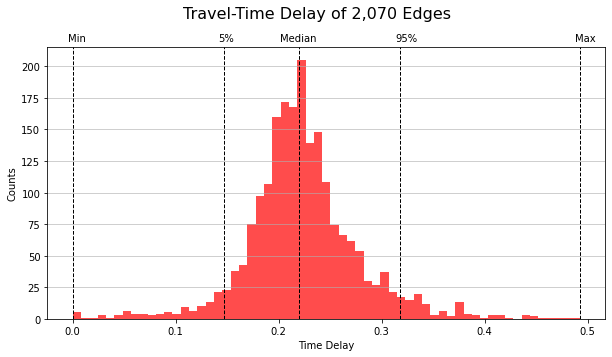

In [ ]:
fig = plt.figure(figsize=(10,5))
x = edge_route_delay_df['avg_delay']
plt.hist(x, bins = 'auto', color='red', alpha=0.7)
plt.grid(axis='y', alpha=0.75)
plt.axvline(0, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.146498, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.219974, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.317991, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.axvline(0.492644, color = 'black', linestyle = 'dashed', linewidth = 1)
plt.text(-0.005, 220, "Min")
plt.text(0.141498, 220, "5%")
plt.text(0.200974, 220, "Median")
plt.text(0.312991, 220, "95%")
plt.text(0.487644, 220, "Max")
plt.xlabel('Time Delay')
plt.ylabel('Counts')
plt.figtext(.5,0.96,'Travel-Time Delay of 2,070 Edges', fontsize=16, ha='center')

plt.show()

In [ ]:
# fig.savefig('time_delay_histo_edge.png', dpi = 200, bbox_inches = 'tight')

In [ ]:
# clean up data
edge_delay_df = edge_route_delay_df[['edge', 'avg_delay']]
edge_delay_df = edge_delay_df.merge(travelTime_df[['origin', 'destination', 'OD']], how='left', left_on='edge', right_on='OD')
edge_delay_df.drop(columns = ['OD'], inplace=True)
edge_delay_df

edge  avg_delay  origin destination
0     中山區下埤里-中山區行仁里   0.162561  中山區下埤里      中山區行仁里
1     中山區行仁里-中山區行政里   0.205473  中山區行仁里      中山區行政里
2     中山區行政里-中山區松江里   0.207938  中山區行政里      中山區松江里
3     中山區松江里-中山區中央里   0.225624  中山區松江里      中山區中央里
4     中山區中央里-中山區中吉里   0.240537  中山區中央里      中山區中吉里
...             ...        ...     ...         ...
2065  萬華區全德里-萬華區忠德里   0.043636  萬華區全德里      萬華區忠德里
2066  萬華區忠貞里-萬華區新和里   0.188847  萬華區忠貞里      萬華區新和里
2067  萬華區日善里-萬華區和德里   0.224939  萬華區日善里      萬華區和德里
2068  萬華區柳鄉里-北投區關渡里   0.179135  萬華區柳鄉里      北投區關渡里
2069  萬華區萬壽里-中正區光復里   0.160754  萬華區萬壽里      中正區光復里

[2070 rows x 4 columns]

In [ ]:
edge_delay_worst = edge_delay_df.sort_values(by=['avg_delay'], ascending=False).head(10)[['edge', 'avg_delay']]
edge_delay_worst.reset_index(drop=True, inplace=True)
edge_delay_worst.rename(columns = {'edge': 'Time Delay Top10'}, inplace=True)
edge_delay_mildest = edge_delay_df.sort_values(by=['avg_delay'], ascending=True).head(10)[['edge', 'avg_delay']]
edge_delay_mildest.reset_index(drop=True, inplace=True)
edge_delay_mildest.rename(columns = {'edge': 'Bottom10'}, inplace=True)
edge_delay_ranking = pd.concat([edge_delay_worst, edge_delay_mildest], axis=1)
edge_delay_ranking

Time Delay Top10  avg_delay       Bottom10  avg_delay
0    萬華區華江里-萬華區柳鄉里   0.492644  文山區萬隆里-文山區萬年里   0.000000
1    萬華區和德里-萬華區華江里   0.482823  內湖區東湖里-內湖區安泰里   0.000000
2    南港區萬福里-南港區成福里   0.469616  內湖區康寧里-內湖區安湖里   0.000000
3    萬華區柳鄉里-萬華區青山里   0.467111  信義區富台里-信義區敦厚里   0.000000
4    萬華區青山里-萬華區菜園里   0.453151  信義區大道里-信義區中坡里   0.000000
5    大同區玉泉里-中正區光復里   0.452084  文山區興安里-文山區景東里   0.012825
6    萬華區錦德里-萬華區和德里   0.450603  中正區永昌里-萬華區騰雲里   0.017878
7    萬華區保德里-萬華區銘德里   0.443606  士林區東山里-士林區陽明里   0.030284
8    中正區黎明里-中正區梅花里   0.440171  萬華區忠德里-萬華區全德里   0.030298
9    萬華區孝德里-萬華區錦德里   0.436434  內湖區明湖里-內湖區安湖里   0.030395

In [ ]:
edge_od_df = pd.pivot_table(edge_delay_df, values='avg_delay', index=['origin'], columns=['destination'])
edge_od_df

destination  中山區下埤里    中山區中原里    中山區中吉里  ...  萬華區青山里    萬華區頂碩里  萬華區騰雲里
origin                                   ...                          
中山區下埤里          NaN       NaN       NaN  ...     NaN       NaN     NaN
中山區中原里          NaN       NaN  0.208363  ...     NaN       NaN     NaN
中山區中吉里          NaN  0.214520       NaN  ...     NaN       NaN     NaN
中山區中央里          NaN       NaN  0.240537  ...     NaN       NaN     NaN
中山區中山里          NaN  0.192961       NaN  ...     NaN       NaN     NaN
...             ...       ...       ...  ...     ...       ...     ...
萬華區錦德里          NaN       NaN       NaN  ...     NaN       NaN     NaN
萬華區雙園里          NaN       NaN       NaN  ...     NaN  0.339994     NaN
萬華區青山里          NaN       NaN       NaN  ...     NaN       NaN     NaN
萬華區頂碩里          NaN       NaN       NaN  ...     NaN       NaN     NaN
萬華區騰雲里          NaN       NaN       NaN  ...     NaN       NaN     NaN

[456 rows x 456 columns]

/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 20013 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 23665 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 21312 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 19979 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 22500 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 37324 missing from current font.
  font.set_

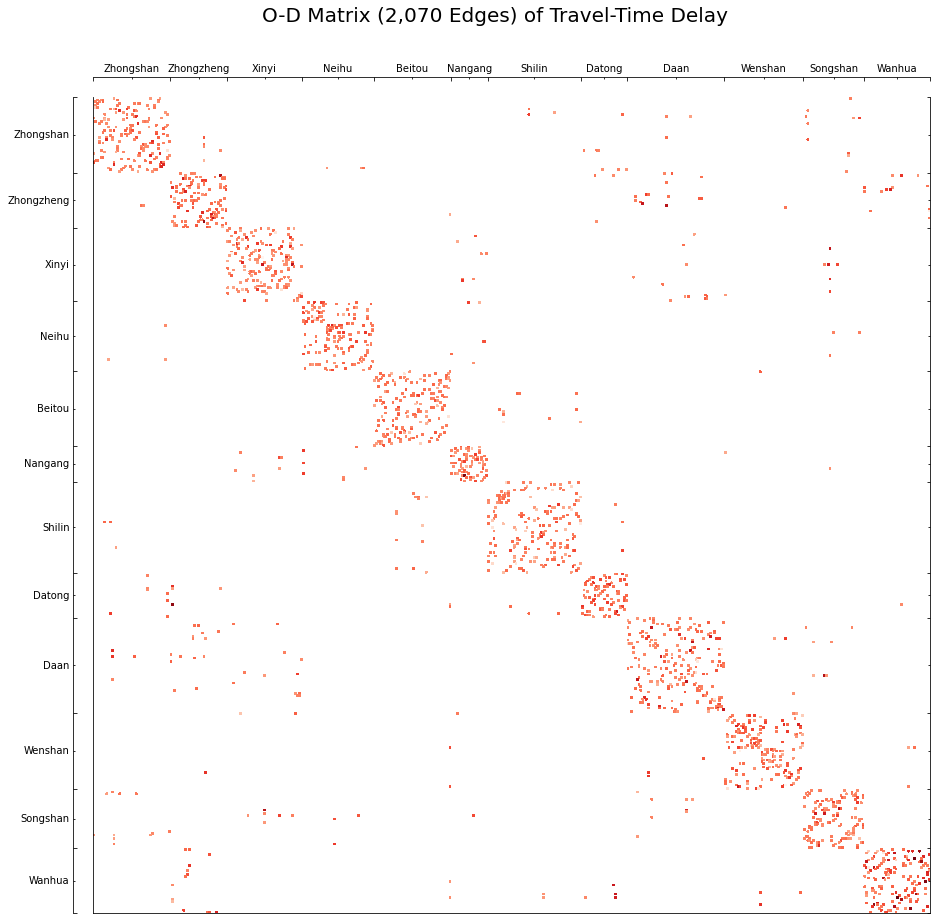

In [ ]:
fig = plt.figure(figsize=(15,15))
ax = SubplotHost(fig, 111)
fig.add_subplot(ax)
# use seaborn heatmap
cax = sns.heatmap(edge_od_df, cmap='Reds', cbar=False)
cax.set_ylabel('')    
cax.set_xlabel('')

# add x and y axis
ax.set_xticks([])
ax.set_yticks([])

ax2 = ax.twiny()
offset = 0, 20 # Position of the second axis
new_axisline = ax2.get_grid_helper().new_fixed_axis
ax2.axis["top"] = new_axisline(loc="top", axes=ax2, offset=offset)
ax2.axis["bottom"].set_visible(False)

xticks = [0, 42, 73, 114, 153, 195, 215, 266, 291, 344, 387, 420, 456]
Locator = [21, 57.5, 93.5, 133.5, 174, 205, 240.5, 278.5, 317.5, 365.5, 403.5, 438]
Formatter = ['Zhongshan', 'Zhongzheng', 'Xinyi', 'Neihu', 'Beitou', 'Nangang', 'Shilin', 'Datong', 'Daan', 'Wenshan', 'Songshan', 'Wanhua']
ax2.set_xticks(xticks)
ax2.xaxis.set_major_formatter(ticker.NullFormatter())
ax2.xaxis.set_minor_locator(ticker.FixedLocator(Locator))
ax2.xaxis.set_minor_formatter(ticker.FixedFormatter(Formatter))

ax3 = ax.twinx()
offset = -20, 0 # Position of the second axis
new_axisline = ax2.get_grid_helper().new_fixed_axis
ax2.axis["left"] = new_axisline(loc="left", axes=ax3, offset=offset)
ax2.axis["right"].set_visible(False)

yticks = [0, 36, 69, 112, 165, 190, 241, 261, 303, 342, 383, 414, 456]
Locator = [18, 52.5, 90.5, 138.5, 177.5, 215.5, 251, 282, 322.5, 362.5, 398.5, 435]
Formatter = ['Wanhua', 'Songshan', 'Wenshan', 'Daan', 'Datong', 'Shilin', 'Nangang', 'Beitou', 'Neihu', 'Xinyi', 'Zhongzheng', 'Zhongshan']
ax3.set_yticks(yticks)
ax3.yaxis.set_major_formatter(ticker.NullFormatter())
ax3.yaxis.set_minor_locator(ticker.FixedLocator(Locator))
ax3.yaxis.set_minor_formatter(ticker.FixedFormatter(Formatter))
plt.figtext(.5,0.95,'O-D Matrix (2,070 Edges) of Travel-Time Delay ', fontsize=20, ha='center')

plt.show()

In [ ]:
# fig.savefig('time_delay.png', dpi = 1000, bbox_inches = 'tight')
# files.download('time_delay.png')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualization

In [ ]:
# load pre-saved data
neigh_off_addr = pd.read_csv('/content/drive/My Drive/Colab Notebooks/Taipei Transportation/neigh_off_addr.csv')
neigh_off_addr = neigh_off_addr[['dist_neigh', 'office_lat', 'office_lng']]
neigh_off_addr.loc[442, 'dist_neigh'] = '萬華區糖蔀里' # change the wrong character
neigh_off_addr

### Export to Kepler.gl

In [ ]:
ori_list = edge_delay_df['origin'].tolist()
ori_lat = []
ori_lng = []
origin_eng = []
for i in ori_list:
  ori_lat.append(float(neigh_off_addr[neigh_off_addr['dist_neigh'] == i]['office_lat']))
  ori_lng.append(float(neigh_off_addr[neigh_off_addr['dist_neigh'] == i]['office_lng']))
  origin_eng.append(tp_df.loc[tp_df['dist_neigh'] == i, 'Vill_eng'].iloc[0])

des_list = edge_delay_df['destination'].tolist()
des_lat = []
des_lng = []
destination_eng = []
for i in des_list:
  des_lat.append(float(neigh_off_addr[neigh_off_addr['dist_neigh'] == i]['office_lat']))
  des_lng.append(float(neigh_off_addr[neigh_off_addr['dist_neigh'] == i]['office_lng']))
  destination_eng.append(tp_df.loc[tp_df['dist_neigh'] == i, 'Vill_eng'].iloc[0])

In [ ]:
edge_delay_df['ori_lat'] = pd.Series(ori_lat)
edge_delay_df['ori_lng'] = pd.Series(ori_lng)
edge_delay_df['des_lat'] = pd.Series(des_lat)
edge_delay_df['des_lng'] = pd.Series(des_lng)
edge_delay_df['origin_eng'] = pd.Series(origin_eng)
edge_delay_df['destination_eng'] = pd.Series(destination_eng)
edge_delay_df

edge  avg_delay  ...      origin_eng destination_eng
0     中山區下埤里-中山區行仁里   0.162561  ...      Xiabi Vil.    Xingren Vil.
1     中山區行仁里-中山區行政里   0.205473  ...    Xingren Vil.  Xingzheng Vil.
2     中山區行政里-中山區松江里   0.207938  ...  Xingzheng Vil.  Songjiang Vil.
3     中山區松江里-中山區中央里   0.225624  ...  Songjiang Vil.  Zhongyang Vil.
4     中山區中央里-中山區中吉里   0.240537  ...  Zhongyang Vil.    Zhongji Vil.
...             ...        ...  ...             ...             ...
2065  萬華區全德里-萬華區忠德里   0.043636  ...     Quande Vil.    Zhongde Vil.
2066  萬華區忠貞里-萬華區新和里   0.188847  ...  Zhongzhen Vil.      Xinhe Vil.
2067  萬華區日善里-萬華區和德里   0.224939  ...     Rishan Vil.       Hede Vil.
2068  萬華區柳鄉里-北投區關渡里   0.179135  ...   Liuxiang Vil.     Guandu Vil.
2069  萬華區萬壽里-中正區光復里   0.160754  ...    Wanshou Vil.    Guangfu Vil.

[2070 rows x 10 columns]

### Combine two directions and show on map

In [ ]:
edge_reverse_delay_df = edge_delay_df.copy()
# add column for mapping
edge_reverse_delay_df['reverse_edge'] = edge_reverse_delay_df['destination'] + '-' + edge_reverse_delay_df['origin']
# find the reverse direction edge
edge_reverse_delay_df['reverse_edge_delay'] = pd.Series([])
reverse_edge_no = []
for i in range(len(edge_reverse_delay_df)):
  if i not in reverse_edge_no: 
    reverse_edge = edge_reverse_delay_df['reverse_edge'][i]
    if reverse_edge in list(edge_reverse_delay_df['edge']):
      reverse_index = edge_reverse_delay_df.index[edge_reverse_delay_df['edge'] == reverse_edge][0]
      reverse_delay = edge_reverse_delay_df.iloc[reverse_index]['avg_delay']
      edge_reverse_delay_df['reverse_edge_delay'][i] = reverse_delay
      reverse_edge_no.append(reverse_index)
edge_reverse_delay_df.drop(reverse_edge_no, inplace=True)
edge_reverse_delay_df['reverse_edge_delay'].fillna(0, inplace=True)
# combine delay time of both directions
edge_reverse_delay_df['delay_bidirectional'] = edge_reverse_delay_df['avg_delay'] + edge_reverse_delay_df['reverse_edge_delay']
edge_reverse_delay_df.reset_index(drop=True, inplace=True)
delay_list = list(edge_reverse_delay_df['delay_bidirectional'])
edge_reverse_delay_df['delay_ranking'] = pd.Series([sorted(delay_list).index(x) for x in delay_list])
edge_reverse_delay_df

edge  avg_delay  ... delay_bidirectional delay_ranking
0     中山區下埤里-中山區行仁里   0.162561  ...            0.437836           555
1     中山區行仁里-中山區行政里   0.205473  ...            0.478895           809
2     中山區行政里-中山區松江里   0.207938  ...            0.415312           428
3     中山區松江里-中山區中央里   0.225624  ...            0.452805           644
4     中山區中央里-中山區中吉里   0.240537  ...            0.443119           585
...             ...        ...  ...                 ...           ...
1103  萬華區菜園里-士林區社新里   0.183448  ...            0.183448            53
1104  萬華區華江里-大同區南芳里   0.200753  ...            0.200753            73
1105  萬華區忠貞里-萬華區新和里   0.188847  ...            0.188847            60
1106  萬華區柳鄉里-北投區關渡里   0.179135  ...            0.179135            50
1107  萬華區萬壽里-中正區光復里   0.160754  ...            0.160754            31

[1108 rows x 14 columns]

In [ ]:
def normalize_for_drawing(dataframe, column, min_w, max_w, min_o, max_o):
  max_value = dataframe[column].max()
  min_value = dataframe[column].min()
  dataframe['line_weight'] = min_w + (dataframe[column] - min_value) / (max_value - min_value) * (max_w - min_w)
  dataframe['line_opacity'] = min_o + (dataframe[column] - min_value) / (max_value - min_value) * (max_o - min_o)
  return dataframe

def df_edge_to_coord_list(dataframe):
  edges_sp_coord = []
  for ori, des in zip(dataframe['origin'], dataframe['destination']):
    edge_coord = []
    neigh_ori = neigh_off_addr[neigh_off_addr['dist_neigh'] == ori]
    neigh_des = neigh_off_addr[neigh_off_addr['dist_neigh'] == des]
    edge_coord.append(neigh_ori[['office_lat', 'office_lng']].values.tolist()[0])
    edge_coord.append(neigh_des[['office_lat', 'office_lng']].values.tolist()[0])
    edges_sp_coord.append(edge_coord)
  return edges_sp_coord

In [ ]:
# find coordinates
edge_reverse_delay_coord = df_edge_to_coord_list(edge_reverse_delay_df)
edge_reverse_delay_df = normalize_for_drawing(edge_reverse_delay_df, 'delay_ranking', 0.2, 7, 0.2, 0.8)

In [ ]:
# construct continuos color map
import branca.colormap as cm
colormap = cm.LinearColormap(colors=['#f7adad','#750101'], index=[0,1108],vmin=0,vmax=1108)
colormap

In [ ]:
map = folium.Map(location=[latitude, longitude], tiles='cartodbpositron', zoom_start=12)

for i in range(len(edge_reverse_delay_df)):
  folium.PolyLine(edge_reverse_delay_coord[i],
    color=colormap(edge_reverse_delay_df['delay_ranking'][i]),
    weight=edge_reverse_delay_df['line_weight'][i],
    opacity=edge_reverse_delay_df['line_opacity'][i]).add_to(map)

map